<a href="https://colab.research.google.com/github/Frabat/CS6460-EdTech/blob/main/EdTech_CS6460_Francesco_Battista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS6460 - EdTech**

##### **Francesco Battista**
##### **fbattista6@gatech.edu**
Full research available [here](https://docs.google.com/document/d/1AnAGXw6-aS6OFwv-9a5if5MsAWjOTlvhms9z6vpFEqQ/edit?usp=sharing)

## **Abstract**

This notebook is meant to be used as a companion for the overall research paper and project presentation.
The goal of the project is to determine weather or not short-form video content, in particular TikTok videos, can be used as effective tools when it comes to delivering educational content.
In particular, the hypothesis that my research focuses are:

### **Null Hypothesis (H<sub>0</sub>)**:
*There is no significant relationship between the characteristics of STEM-related TikToks (e.g., creator demographics, content features) and audience engagement or perceived educational value.*

### **Alternative Hypothesis (H<sub>1</sub>)**:
*There is a significant relationship between the characteristics of STEM-related TikToks and audience engagement or percieved educational value*.<br>
The ***Alternative Hypothesis** can be furtherly divided into three smaller sections:
- ***H<sub>1</sub>a*** : content created by educators or STEM professionals receive higher engagement than those created by general influencers
- ***H<sub>1</sub>b*** : Videos with multiple modalities (e.g., voiceover, subtitles, graphics) correlate with more positive sentiment in comments
- ***H<sub>1</sub>c*** : Students report higher educational value in videos with high production quality and clear structure


## **Project Architecture**

### **Introduction**

This Jupyter Notebook is delivered through Google Colab. To the evaluators, a copy of the code will be shared both as a Colab Notebook and shared with the teachers in the required .zip file at the end of the course.
For obvious reasons, in the sharable copy of this notebook, secrets and direct access to raw data will be omitted. However, a copy of the data will be available for the instructors to review in the .zip file containing the material.

### **Architecture**
This notebook uses the [TikTokApi](https://github.com/davidteather/TikTok-Api) library. The library runs an headless instance of Google Chrome, controlled via Playwright, that can retrieve information directly from the social network.
The library cannot access to any kind of user-protected routes, therefore can only retrieve data that is pubblicly accessible.

## **Data Scraping**

In [ ]:
#@title **Setup**
### **Install required libraries**
!pip install TikTokApi
!python -m playwright install

### **Install Google Chrome**
!wget https://mirror.cs.uchicago.edu/google-chrome/pool/main/g/google-chrome-stable/google-chrome-stable_115.0.5790.170-1_amd64.deb -O google-chome.deb
!apt-get -y install `pwd`/google-chome.deb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 MB 46.3 MB/s eta 0:00:00
172.5 MiB [] 0% 0.0s172.5 MiB [] 0% 2.3s172.5 MiB [] 1% 1.7s172.5 MiB [] 2% 1.6s172.5 MiB [] 4% 1.4s172.5 MiB [] 5% 1.4s172.5 MiB [] 6% 1.4s172.5 MiB [] 7% 1.4s172.5 MiB [] 8% 1.3s172.5 MiB [] 9% 1.3s172.5 MiB [] 11% 1.3s172.5 MiB [] 13% 1.2s172.5 MiB [] 14% 1.1s172.5 MiB [] 15% 1.1s172.5 MiB [] 17% 1.1s172.5 MiB [] 18% 1.0s172.5 MiB [] 20% 1.0s172.5 MiB [] 21% 1.0s172.5 MiB [] 23% 1.0s172.5 MiB [] 24% 0.9s172.5 MiB [] 26% 0.9s172.5 MiB [] 27% 0.9s172.5 MiB [] 29% 0.8s172.5 MiB [] 31% 0.8s172.5 MiB [] 33% 0.8s172.5 MiB [] 35% 0.7s172.5 MiB [] 37% 0.7s172.5 MiB [] 40% 0.6s172.5 MiB [] 42% 0.6s172.5 MiB [] 44% 0.6s172.5 MiB [] 46% 0.5s172.5 MiB [] 48% 0.5s172.5 MiB [] 50% 0.5s172.5 MiB [] 52% 0.5s172.5 MiB [] 54% 0.5s172.5 MiB [] 56% 0.4s172.5 MiB [] 58% 0.4s172.5 MiB [] 59% 0.4s172.5 MiB [] 61% 0.4s172.5 MiB [] 63% 0.4s172.5 MiB [] 

In [ ]:
#@title **Imports**
from TikTokApi import TikTokApi
import asyncio
import os
import pandas as pd
from google.colab import userdata, drive

In [ ]:
#@title **Define variables**

ms_token = userdata.get('ms_token')
executable_path="/opt/google/chrome/google-chrome"
headless=True
sleep_after=3
timeout=0
user_handles=['geodesaurus', 'astrosamantha','annelisethearchaeologist','lab_shenanigans','drdre4000', 'chemteacherphil', 'instituteofhumananatomy','muhtanya', 'markrober','astroathens','coolchemistryguy','techience','neildegrassetyson','thephysicshouse','billnye']

In [ ]:
#@title **Define Metadata Scraping Method**

async def scrape_metadata(user_handle, count):
  async with TikTokApi() as api:
    videos = list()
    await api.create_sessions(ms_tokens=[ms_token], headless=True, sleep_after=3, executable_path="/opt/google/chrome/google-chrome", timeout=0)
    user = api.user(user_handle)
    for _ in range(int(count/30)):
      async for video in user.videos(count=30):
        videos.append(video.as_dict)
    return videos


In [ ]:
#@title **Define Comment Scraping Method**

async def get_comments(video_id):
  async with TikTokApi() as api:
    comments = list()
    await api.create_sessions(ms_tokens=[ms_token], headless=True, sleep_after=3, executable_path="/opt/google/chrome/google-chrome", timeout=0)
    video = api.video(id=video_id)
    count = 0
    async for comment in video.comments(count=30):
      comments.append(comment.as_dict)
    return comments





In [ ]:
#@title **Run the loop for all the user handles.**
frames = []
for handle in user_handles:
  try:
    metadata = await scrape_metadata(handle, 90)
    df = pd.DataFrame(metadata)
    frames.append(df)
  except EmptyResponseException as e:
    print(e)
  finally:
    print(f"Finished scraping {handle}")
# Now concat all the dataframes in the list
result_df = pd.concat(frames)

In [ ]:
#@title **Export dataframe to Google Drive as a .csv file to avoid refetching all the data**
drive.mount('/drive')
result_df.to_csv('/drive/My Drive/EdTech_Final_Project_2025/video_metadata.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
#@title **Import data from .csv file**
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/video_metadata.csv')
ids = df['id'].tolist()

Mounted at /drive


In [ ]:
print(ids)

[7401152384879037742, 7417644441982356778, 7291332398216662315, 7476242839823797534, 7472902170057264415, 7472042732056317215, 7471708925675572510, 7469228623619296542, 7462366493909552415, 7459205735331663134, 7452017959549078814, 7440939462437260590, 7440504037528587566, 7432449469343386911, 7432173405832613150, 7432137004449549599, 7431725088145296670, 7431608409503452446, 7431383240117734687, 7431013861823909166, 7430618363749043498, 7430519529542864170, 7430248936130088235, 7429889341108882731, 7429503768024321326, 7429417241797610794, 7429145463741238574, 7428400423007964459, 7428226540124654891, 7428039999712529710, 7427629525283966251, 7427278895893744942, 7426899106045513003, 7426544471463988526, 7426206026526936363, 7426147087886109995, 7425791339020979502, 7401152384879037742, 7417644441982356778, 7291332398216662315, 7476242839823797534, 7472902170057264415, 7472042732056317215, 7471708925675572510, 7469228623619296542, 7462366493909552415, 7459205735331663134, 745201795954

In [29]:
comments = []

In [ ]:
# @title **Use Comment Scraping function to get comments from each video**
# comments =[]
for id in ids:
  try:
    video_comment = await get_comments(id)
    df = pd.DataFrame(video_comment)
    comments.append(df)
  # except EmptyResponseException as e:
  #   print(e)
  finally:
    print(f"Finished scraping {id}")
comments_df = pd.concat(comments)
comments_df.head()

Finished scraping 7401152384879037742
Finished scraping 7417644441982356778
Finished scraping 7291332398216662315
Finished scraping 7476242839823797534
Finished scraping 7472902170057264415
Finished scraping 7472042732056317215
Finished scraping 7471708925675572510
Finished scraping 7469228623619296542
Finished scraping 7462366493909552415
Finished scraping 7459205735331663134
Finished scraping 7452017959549078814
Finished scraping 7440939462437260590
Finished scraping 7440504037528587566
Finished scraping 7432449469343386911
Finished scraping 7432173405832613150
Finished scraping 7432137004449549599
Finished scraping 7431725088145296670
Finished scraping 7431608409503452446
Finished scraping 7431383240117734687
Finished scraping 7431013861823909166
Finished scraping 7430618363749043498
Finished scraping 7430519529542864170
Finished scraping 7430248936130088235
Finished scraping 7429889341108882731
Finished scraping 7429503768024321326
Finished scraping 7429417241797610794
Finished scr

KeyError: 'unique_id'

In [ ]:
# @title **Export the DF as a .csv file in Google Drive**

comments_df = pd.concat(comments)
comments_df.head()
comments_df.to_csv('/drive/My Drive/EdTech_Final_Project_2025/comments.csv')

## **Data Analysis**

*   Link to video metadata [dataset](https://drive.google.com/file/d/1xtbKrlNIpKJm_rYwyPK6NgaxzW0uJhg4/view?usp=sharing)
*   Link to comments [dataset](https://drive.google.com/file/d/1q4DW26AN9d6vvzPAyj6rxIMpSHeis16v/view?usp=sharing)
*   Link to survey answers [dataset](https://drive.google.com/file/d/108d5dyGl8ZQoPNhST4D5QmPB4JwEFivm/view?usp=sharing)


In [23]:
# @title **Imports**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import nltk
from google.colab import userdata, drive
import sklearn

### **Video Metadata Analysis**


In [4]:
# @title **Import the Video Metadata Dataset**
drive.mount('/drive')
video_metadata = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/video_metadata.csv')
video_metadata.head()
video_metadata.info()
video_metadata.describe()
video_metadata.isnull().sum()

Mounted at /drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1641 non-null   int64  
 1   AIGCDescription             0 non-null      float64
 2   CategoryType                1641 non-null   int64  
 3   author                      1641 non-null   object 
 4   authorStats                 1641 non-null   object 
 5   authorStatsV2               1641 non-null   object 
 6   backendSourceEventTracking  0 non-null      float64
 7   challenges                  1146 non-null   object 
 8   collected                   1641 non-null   bool   
 9   contents                    1626 non-null   object 
 10  createTime                  1641 non-null   int64  
 11  desc                        1626 non-null   object 
 12  digged                      1641 non-null   bool   
 13  diversification

,0
Unnamed: 0,0
AIGCDescription,1641
CategoryType,0
author,0
authorStats,0
authorStatsV2,0
backendSourceEventTracking,1641
challenges,495
collected,0
contents,15


#### **Clean video_metadata dataset**

In [5]:
# @title **Data Cleaning and Feature Engineering**
# take the video_metadata dataframe as input and returns a DataFrame with flattened columns and engineered features

def clean_video_metadata(df: pd.DataFrame) -> pd.DataFrame:
    """
    Flatten nested JSON cols and engineer:
      - has_subtitles  (from video_subtitleInfos)
      - has_graphics   (from effectStickers or videoSuggestWordsList)
      - has_voiceover  (from music == 'Original sound')
    """
    # Parse nested JSON columns
    def parse_dict(val):
        try:
            return ast.literal_eval(val) if isinstance(val, str) else {}
        except (ValueError, SyntaxError):
            return {}

    for col in ['stats', 'authorStats', 'video']:
        parsed = df[col].apply(parse_dict).apply(pd.Series)
        parsed.columns = [f"{col}_{c}" for c in parsed.columns]
        df = pd.concat([df, parsed], axis=1)
        df.drop(columns=[col], inplace=True)

    # Drop rows missing key metrics
    df = df[df['stats_playCount'].notna() & df['video_duration'].notna()]
    df['flag_zero_views'] = df['stats_playCount'] == 0

    # Modality flags

    # Subtitles: non-null subtitleInfos with some content
    df['has_subtitles'] = (
        df['video_subtitleInfos']
          .fillna('[]')
          .apply(lambda s: len(str(s)) > 2)
    )

    # Graphics: either sticker effects or suggest words list present
    df['has_graphics'] = (
        df['effectStickers'].notna() |
        df['videoSuggestWordsList'].notna()
    )

    # Voiceover: TikTok’s “Original sound” in the music field
    if 'video_hasVoice' in df.columns:
        df['has_voiceover'] = df['video_hasVoice'].fillna(False).astype(bool)
    else:
        # fallback to Original sound in music
        df['has_voiceover'] = (
            df['music']
              .fillna('')
              .str.contains('Original sound', case=False, na=False)
        )


    # Educator flag
    keywords = ['geodesaurus', 'drdre4000', 'chemteacherphil', 'billnye', 'neildegrassetyson']
    def flag_educator(text):
        txt = str(text).lower()
        return any(kw.lower() in txt for kw in keywords)

    df['is_educator'] = df['author'].fillna('').apply(flag_educator)

    # Compute num_modalities
    df['num_modalities'] = (
          df['has_subtitles'].astype(int)
        + df['has_graphics'].astype(int)
        + df['has_voiceover'].astype(int)
    )

    return df


In [8]:
# @title **Create cleaned_video_metadata dataset**
cleaned_df = clean_video_metadata(video_metadata)
cleaned_df.head()
print(cleaned_df[['has_voiceover','has_subtitles','has_graphics','num_modalities']].agg(['sum','mean']))
print(cleaned_df['num_modalities'].value_counts().sort_index())

      has_voiceover  has_subtitles  has_graphics  num_modalities
sum     1242.000000    1305.000000    825.000000     3372.000000
mean       0.756856       0.795247      0.502742        2.054845
num_modalities
0    102
1    207
2    831
3    501
Name: count, dtype: int64


In [9]:
# @title **Save output to Google Drive for future usage**
cleaned_df.to_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


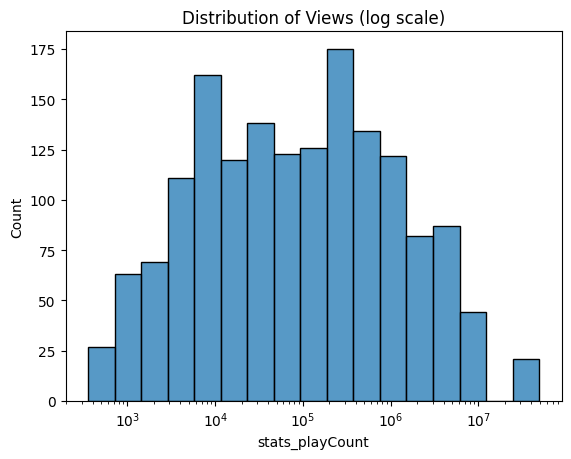

                           stats_playCount  stats_diggCount  stats_shareCount  \
stats_playCount                   1.000000         0.836964          0.523073   
stats_diggCount                   0.836964         1.000000          0.714654   
stats_shareCount                  0.523073         0.714654          1.000000   
video_duration                   -0.086440        -0.070769         -0.062721   
authorStats_followerCount         0.043952         0.055040          0.101824   
num_modalities                   -0.135422        -0.153173         -0.184604   

                           video_duration  authorStats_followerCount  \
stats_playCount                 -0.086440                   0.043952   
stats_diggCount                 -0.070769                   0.055040   
stats_shareCount                -0.062721                   0.101824   
video_duration                   1.000000                   0.211356   
authorStats_followerCount        0.211356                   1.000000   


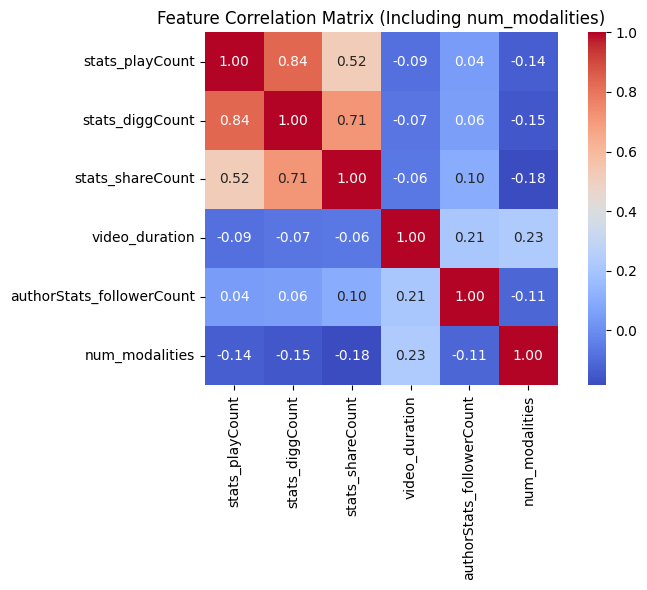

In [10]:
# @title **Descriptive & Exploratory Analysis**
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv')

for col in ['has_subtitles','has_graphics','has_voiceover']:
    df[col] = df[col].fillna(False).astype(int)
df['num_modalities'] = df[['has_subtitles','has_graphics','has_voiceover']].sum(axis=1)

sns.histplot(df['stats_playCount'], log_scale=True)
plt.title("Distribution of Views (log scale)")
plt.show()

features = [
    'stats_playCount','stats_diggCount','stats_shareCount',
    'video_duration','authorStats_followerCount','num_modalities'
]
corr = df[features].corr()

print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Matrix (Including num_modalities)")
plt.tight_layout()
plt.show()

In [11]:
# @title **Group Ttests**
from tabulate import tabulate
from scipy.stats import f_oneway, ttest_ind

drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv')
print("")
def group_ttests(df):
    """
    Performs two-sample t-tests on likes and shares for educators vs. non-educators.
    Returns a dictionary with test statistics and p-values.
    """
    results = {}

    # Safe t-test helper
    def safe_ttest(a, b):
        a_clean = a.dropna()
        b_clean = b.dropna()
        if len(a_clean) < 2 or len(b_clean) < 2:
            return np.nan, np.nan
        return ttest_ind(a_clean, b_clean, nan_policy='omit')

    # Likes: educators vs. non-educators
    edu_likes = df[df['is_educator']]['stats_diggCount']
    non_likes = df[~df['is_educator']]['stats_diggCount']
    t_likes, p_likes = safe_ttest(edu_likes, non_likes)
    results['t_test_likes_edu_vs_non'] = {'t_stat': t_likes, 'p_value': p_likes}

    # Shares: educators vs. non-educators
    edu_shares = df[df['is_educator']]['stats_shareCount']
    non_shares = df[~df['is_educator']]['stats_shareCount']
    t_shares, p_shares = safe_ttest(edu_shares, non_shares)
    results['t_test_shares_edu_vs_non'] = {'t_stat': t_shares, 'p_value': p_shares}

    return results




comparison_results = group_ttests(df)

rows = []
for test_name, outcome in comparison_results.items():
    if isinstance(outcome, dict):
        stat = outcome.get('t_stat')
        p_val = outcome.get('p_value')
        note = ''
    else:
        stat = ''
        p_val = ''
        note = outcome
    rows.append([test_name, stat, p_val, note])
print(tabulate(rows, headers=['Test', 'Statistic', 'p-value', 'Note'], floatfmt=(".4f", ".2e")))

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).

Test                        Statistic      p-value  Note
------------------------  -----------  -----------  ------
t_test_likes_edu_vs_non      6.07e-01  0.543699
t_test_shares_edu_vs_non     4.09e+00  4.56016e-05


In [12]:
# @title **Multivariate Regression**

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv')

# Prepare variables by log-transforming engagement and followers
df['log_views'] = np.log1p(df['stats_playCount'])
df['log_likes'] = np.log1p(df['stats_diggCount'])
df['log_shares'] = np.log1p(df['stats_shareCount'])
df['log_followers'] = np.log1p(df['authorStats_followerCount'])

# Define regression formula

formula = 'log_views ~ num_modalities + video_duration + log_followers + is_educator'

model = smf.ols(formula=formula, data=df).fit()

print(model.summary())


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
                            OLS Regression Results                            
Dep. Variable:              log_views   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     34.20
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           1.91e-27
Time:                        13:54:47   Log-Likelihood:                -4094.1
No. Observations:                1641   AIC:                             8198.
Df Residuals:                    1636   BIC:                             8225.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------

In [13]:
# @title **Test Robustness using OLS and POISSON GLM**
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 1. Load and prepare
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv')

# Construct variables
df['log_views'] = np.log1p(df['stats_playCount'])
df['num_modalities'] = (
      df['has_subtitles'].astype(int)
    + df['has_graphics'].astype(int)
    + df['has_voiceover'].astype(int)
)
df['log_followers'] = np.log1p(df['authorStats_followerCount'])

# Ensure correct dtypes
for col in ['is_educator','num_modalities','video_duration','log_followers','stats_playCount']:
    df[col] = pd.to_numeric(df[col], errors='raise')

# 2. OLS with robust standard errors
ols = smf.ols(
    'log_views ~ is_educator + num_modalities + video_duration + log_followers',
    data=df
).fit()
print("=== OLS (HC3 robust SE) ===")
print(ols.get_robustcov_results(cov_type='HC3').summary())

# 3. Poisson GLM on raw view counts
X = df[['is_educator', 'num_modalities', 'video_duration', 'log_followers']].astype(float)
X = sm.add_constant(X)
y = df['stats_playCount'].astype(int)
poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print("\n=== Poisson GLM ===")
print(poisson.summary())

# 4. OLS with interaction term & robust SE
interaction = smf.ols(
    'log_views ~ is_educator * num_modalities + video_duration + log_followers',
    data=df
).fit()
print("\n=== OLS with Interaction (HC3 robust SE) ===")
print(interaction.get_robustcov_results(cov_type='HC3').summary())


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
=== OLS (HC3 robust SE) ===
                            OLS Regression Results                            
Dep. Variable:              log_views   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     53.71
Date:                Sat, 26 Jul 2025   Prob (F-statistic):           1.40e-42
Time:                        13:54:54   Log-Likelihood:                -4094.1
No. Observations:                1641   AIC:                             8198.
Df Residuals:                    1636   BIC:                             8225.
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                          coef    std err          t      P>|t|      

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


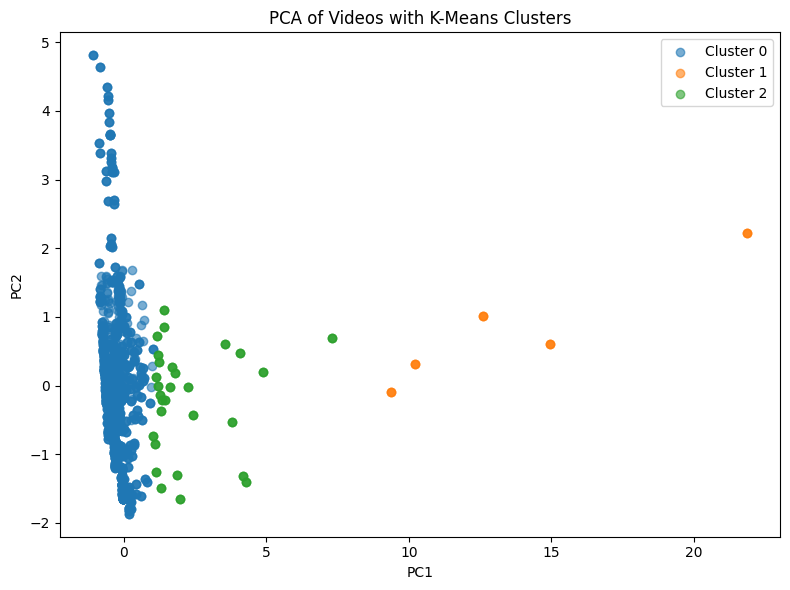

Cluster Sizes:
cluster
0    1539
1      15
2      87
Name: count, dtype: int64


In [14]:
# @title **Clustering and Dimensionality**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load cleaned data
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv')

# Recompute num_modalities if missing
if 'num_modalities' not in df.columns:
    df['num_modalities'] = (
          df['has_voiceiver'].astype(int)
        + df['has_subtitles'].astype(int)
        + df['has_graphics'].astype(int)
    )

# Prepare features for clustering/PCA
features = [
    'stats_playCount', 'stats_diggCount', 'stats_shareCount',
    'video_duration', 'authorStats_followerCount', 'num_modalities'
]

# Ensure numeric and handle missing
X = df[features].fillna(0).astype(float)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = pcs[:, 0], pcs[:, 1]

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(pcs)

# Plot PCA scatter with clusters
plt.figure(figsize=(8,6))
for cluster in sorted(df['cluster'].unique()):
    mask = df['cluster'] == cluster
    plt.scatter(df.loc[mask, 'PC1'], df.loc[mask, 'PC2'], label=f'Cluster {cluster}', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Videos with K-Means Clusters')
plt.legend()
plt.tight_layout()
plt.show()

# Print cluster sizes
cluster_sizes = df['cluster'].value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
Cluster Interpretation:
 - Low-engagement: mean views=459493.6, likes=37373.7, shares=1088.0, modalities=2.10
 - High-engagement: mean views=35900000.0, likes=5820000.0, shares=210620.0, modalities=0.80
 - Medium-engagement: mean views=8334482.8, likes=813665.5, shares=29933.3, modalities=1.45


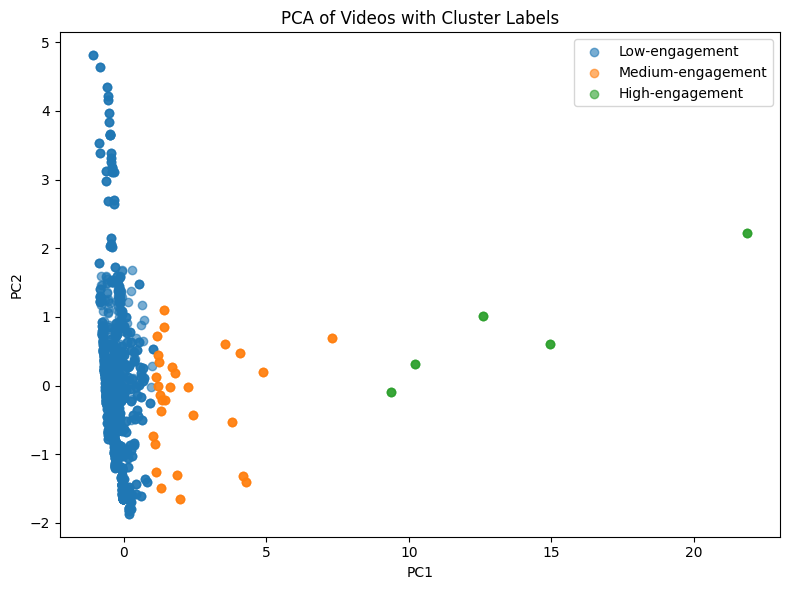

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load cleaned data
drive.mount('/drive')
df = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv')

# 2. Recompute num_modalities if missing
if 'num_modalities' not in df.columns:
    df['num_modalities'] = (
        df['has_voiceiver'].astype(int) +
        df['has_subtitles'].astype(int) +
        df['has_graphics'].astype(int)
    )

# 3. Select features for PCA/clustering
features = [
    'stats_playCount', 'stats_diggCount', 'stats_shareCount',
    'video_duration', 'authorStats_followerCount', 'num_modalities'
]
X = df[features].fillna(0).astype(float)

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA to 2 components
pca = PCA(n_components=2, random_state=42)
pcs = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = pcs[:, 0], pcs[:, 1]

# 6. K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(pcs)

# 7. Compute cluster means for interpretation
cluster_means = df.groupby('cluster')[features].mean().reset_index()

# 8. Label clusters by mean playCount (Low, Medium, High)
order = cluster_means.sort_values('stats_playCount')['cluster'].tolist()
label_map = {order[0]: 'Low-engagement', order[1]: 'Medium-engagement', order[2]: 'High-engagement'}
df['cluster_label'] = df['cluster'].map(label_map)

# clusters_df = df[['id', 'cluster', 'cluster_label']]

# 9. Print cluster interpretation
print("Cluster Interpretation:")
for i, row in cluster_means.iterrows():
    label = label_map[row['cluster']]
    print(f" - {label}: mean views={row['stats_playCount']:.1f}, "
          f"likes={row['stats_diggCount']:.1f}, shares={row['stats_shareCount']:.1f}, "
          f"modalities={row['num_modalities']:.2f}")

# 10. Plot PCA scatter with cluster labels
plt.figure(figsize=(8,6))
for label in df['cluster_label'].unique():
    mask = df['cluster_label'] == label
    plt.scatter(df.loc[mask, 'PC1'], df.loc[mask, 'PC2'], label=label, alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Videos with Cluster Labels')
plt.legend()
plt.tight_layout()
plt.show()
df.to_csv('/drive/My Drive/EdTech_Final_Project_2025/video_metadata_with_clustering.csv')


### **Comments Analysis**


In [11]:
# @title **Import the Comments Dataset**
drive.mount('/drive')
comments = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/comments.csv', dtype={'aweme_id':str})
comments.head()
comments.info()
comments.describe()
comments.isnull().sum()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               5557 non-null   int64  
 1   author_pin               5557 non-null   bool   
 2   aweme_id                 5557 non-null   object 
 3   cid                      5557 non-null   int64  
 4   collect_stat             5557 non-null   int64  
 5   comment_language         5557 non-null   object 
 6   comment_post_item_ids    0 non-null      float64
 7   create_time              5557 non-null   int64  
 8   digg_count               5557 non-null   int64  
 9   image_list               0 non-null      float64
 10  is_author_digged         5557 non-null   bool   
 11  is_comment_translatable  5557 non-null   bool   
 12  is_high_purchase_in

,0
Unnamed: 0,0
author_pin,0
aweme_id,0
cid,0
collect_stat,0
comment_language,0
comment_post_item_ids,5557
create_time,0
digg_count,0
image_list,5557


In [12]:
# @title **Comment Sentiment Analysis**

import pandas as pd
from tabulate import tabulate
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

comments['sentiment'] = comments['text'].fillna('').apply(lambda x: sia.polarity_scores(x)['compound'])

video_sentiment = comments.groupby('aweme_id')['sentiment'].agg(
    mean_sentiment='mean',
    std_sentiment='std',
    comment_count='count'
).reset_index()

print(tabulate(video_sentiment.head(20), headers='keys', tablefmt='github', floatfmt=".4f"))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


|    |            aweme_id |   mean_sentiment |   std_sentiment |   comment_count |
|----|---------------------|------------------|-----------------|-----------------|
|  0 | 7120616651594206470 |          -0.0332 |          0.2350 |              35 |
|  1 | 7122475627646651653 |          -0.0244 |          0.1817 |              40 |
|  2 | 7136235721437809925 |           0.0731 |          0.2655 |              40 |
|  3 | 7137331134924344582 |           0.0339 |          0.2604 |              40 |
|  4 | 7138424897319046406 |           0.0511 |          0.2318 |              39 |
|  5 | 7138792793492704517 |           0.1059 |          0.3274 |              39 |
|  6 | 7139155117256871173 |           0.1613 |          0.3473 |              40 |
|  7 | 7141029127284378885 |           0.0204 |          0.2108 |              37 |
|  8 | 7142517254478007558 |           0.1180 |          0.2498 |              39 |
|  9 | 7142884945789226246 |           0.0699 |          0.2439 |           

In [20]:
# @title **Merge sentiment analysis scores with available videos**

videos = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/cleaned_video_metadata.csv', dtype={'id': str})
videos_with_sentiment = videos.merge(video_sentiment, left_on='id', right_on='aweme_id', how='inner')
videos.head()

,Unnamed: 0.1,Unnamed: 0,AIGCDescription,CategoryType,author,authorStatsV2,backendSourceEventTracking,challenges,collected,contents,...,video_videoQuality,video_volumeInfo,video_width,video_zoomCover,flag_zero_views,has_subtitles,has_graphics,has_voiceover,is_educator,num_modalities
0,0,0,NaN,120,"{'UserStoryStatus': 0, 'avatarLarger': 'https:...","{'diggCount': '69600', 'followerCount': '18000...",NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Replying to @endofthethreadofthings...,...,normal,"{'Loudness': -26.8, 'Peak': 0.31989}",576,{'240': 'https://p19-pu-sign-useast8.tiktokcdn...,False,True,True,False,True,2
1,1,1,NaN,0,"{'UserStoryStatus': 0, 'avatarLarger': 'https:...","{'diggCount': '69600', 'followerCount': '18000...",NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Replying to @Joanna Schuth GHOSTIE ...,...,normal,"{'Loudness': -26.4, 'Peak': 0.26607}",576,{'240': 'https://p16-sign.tiktokcdn-us.com/tos...,False,True,True,False,True,2
2,2,2,NaN,120,"{'UserStoryStatus': 0, 'avatarLarger': 'https:...","{'diggCount': '69600', 'followerCount': '18000...",NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Replying to @BagheeraAndBaloo Surpr...,...,normal,"{'Loudness': -25.3, 'Peak': 0.43152}",576,{'240': 'https://p19-pu-sign-useast8.tiktokcdn...,False,True,True,False,True,2
3,3,3,NaN,105,"{'UserStoryStatus': 0, 'avatarLarger': 'https:...","{'diggCount': '69600', 'followerCount': '18000...",NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Thanks for sending the Endurance to...,...,normal,"{'Loudness': -26.1, 'Peak': 0.39355}",576,{'240': 'https://p19-pu-sign-useast8.tiktokcdn...,False,True,True,False,True,2
4,4,4,NaN,101,"{'UserStoryStatus': 0, 'avatarLarger': 'https:...","{'diggCount': '69600', 'followerCount': '18000...",NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Last Breath is 10/10 spookies. Only...,...,normal,"{'Loudness': -23.4, 'Peak': 0.48978}",576,{'240': 'https://p19-pu-sign-useast8.tiktokcdn...,False,True,True,False,True,2


In [22]:
videos_with_sentiment.to_csv('/drive/My Drive/EdTech_Final_Project_2025/videos_with_sentiment.csv')

In [26]:
# @title **Topic Modelling with LDA**

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
stops = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
  tokens = nltk.word_tokenize(doc.lower())
  tokens = [t for t in tokens if t.isalpha() and t not in stops]
  return " ".join(lemmatizer.lemmatize(t) for t in tokens)

comments['clean'] = comments['text'].fillna('').apply(preprocess)

vectorizer = CountVectorizer(max_df=0.95, min_df=10, ngram_range=(1,2))
dtm = vectorizer.fit_transform(comments['clean'])

# 4) Fit LDA
n_topics = 8
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(dtm)

# 5) Display top words per topic
def show_topics(model, feature_names, n_top_words):
    topics = []
    for idx, comp in enumerate(model.components_):
        words = [feature_names[i] for i in comp.argsort()[:-n_top_words-1:-1]]
        topics.append((idx, words))
    return topics

feature_names = vectorizer.get_feature_names_out()
topics = show_topics(lda, feature_names, 10)
for idx, words in topics:
    print(f"Topic {idx}: {', '.join(words)}")

# 6) Assign each comment its dominant topic
topic_dist = lda.transform(dtm)
comments['dom_topic'] = topic_dist.argmax(axis=1)

# 7) Aggregate topic proportions per video
video_topics = (
    comments
      .groupby('aweme_id')['dom_topic']
      .value_counts(normalize=True)
      .unstack(fill_value=0)
      .reset_index()
)

print("\nVideo‑level topic proportions (first 5 rows):")
print(video_topics.head())

Topic 0: yes, hello, like, would, yes hello, right, water, get, feel, um
Topic 1: la, di, che, book, space, coloring, samantha, il, omg, non
Topic 2: back, na, thing, never, gon, gon na, go, sip, many, oh
Topic 3: spooky, lake, spooky lake, month, lake month, year, day, love, end, october
Topic 4: video, one, time, please, spookies, super, never, sea, story, best
Topic 5: book, good, soup, like, excited, look, good soup, got, geo, could
Topic 6: lake, love, baikal, lake baikal, book, geo, wait, thank, get, superior
Topic 7: spookies, water, thank, amazing, much, day, hydrology, haunted, work, haunted hydrology

Video‑level topic proportions (first 5 rows):
dom_topic             aweme_id         0         1         2         3  \
0          7120616651594206470  0.571429  0.228571  0.057143  0.000000   
1          7122475627646651653  0.250000  0.525000  0.075000  0.000000   
2          7136235721437809925  0.325000  0.400000  0.000000  0.000000   
3          7137331134924344582  0.37500

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate

# 2) Set up vectorizers
uni_vec = CountVectorizer(max_df=0.95, min_df=5, ngram_range=(1,1))
bi_vec = CountVectorizer(max_df=0.95, min_df=5, ngram_range=(2,2))

# 3) Fit & transform
uni_counts = uni_vec.fit_transform(comments['clean'])
bi_counts  = bi_vec.fit_transform(comments['clean'])

# 4) Sum up frequencies
uni_freq = uni_counts.sum(axis=0).A1
bi_freq  = bi_counts.sum(axis=0).A1

# 5) Get feature names and pair with counts
uni_feats = uni_vec.get_feature_names_out()
bi_feats  = bi_vec.get_feature_names_out()

uni_df = pd.DataFrame({
    'token': uni_feats,
    'count': uni_freq
}).sort_values('count', ascending=False).head(20)

bi_df = pd.DataFrame({
    'token': bi_feats,
    'count': bi_freq
}).sort_values('count', ascending=False).head(20)

# 6) Display top 20 unigrams and bigrams
print("Top 20 Unigrams:")
print(tabulate(uni_df, headers='keys', tablefmt='github', showindex=False))

print("\nTop 20 Bigrams:")
print(tabulate(bi_df, headers='keys', tablefmt='github', showindex=False))


Top 20 Unigrams:
| token    |   count |
|----------|---------|
| lake     |    1055 |
| spooky   |     865 |
| month    |     510 |
| love     |     382 |
| like     |     366 |
| book     |     360 |
| one      |     272 |
| video    |     261 |
| yes      |     248 |
| geo      |     237 |
| day      |     227 |
| would    |     221 |
| thank    |     220 |
| year     |     220 |
| water    |     217 |
| get      |     214 |
| spookies |     212 |
| hello    |     195 |
| time     |     179 |
| got      |     150 |

Top 20 Bigrams:
| token             |   count |
|-------------------|---------|
| spooky lake       |     699 |
| lake month        |     409 |
| yes hello         |     171 |
| lake baikal       |      93 |
| um yes            |      69 |
| good soup         |      67 |
| lake superior     |      65 |
| gon na            |      57 |
| coloring book     |      52 |
| feel like         |      49 |
| haunted hydrology |      46 |
| lake book         |      42 |
| next year 

['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'AIGCDescription', 'CategoryType', 'author', 'authorStatsV2', 'backendSourceEventTracking', 'challenges', 'collected', 'contents', 'createTime', 'desc', 'digged', 'diversificationId', 'duetDisplay', 'duetEnabled', 'effectStickers', 'forFriend', 'id', 'isAd', 'isPinnedItem', 'isReviewing', 'itemCommentStatus', 'item_control', 'music', 'officalItem', 'originalItem', 'playlistId', 'privateItem', 'secret', 'shareEnabled', 'statsV2', 'stickersOnItem', 'stitchDisplay', 'stitchEnabled', 'textExtra', 'textLanguage', 'textTranslatable', 'videoSuggestWordsList', 'anchors', 'BAInfo', 'adAuthorization', 'adLabelVersion', 'poi', 'warnInfo', 'itemMute', 'imagePost', 'titleLanguage', 'titleTranslatable', 'aigcLabelType', 'duetInfo', 'stats_collectCount', 'stats_commentCount', 'stats_diggCount', 'stats_playCount', 'stats_shareCount', 'authorStats_diggCount', 'authorStats_followerCount', 'authorStats_followingCount', 'authorStats_friendCount', 'authorStats

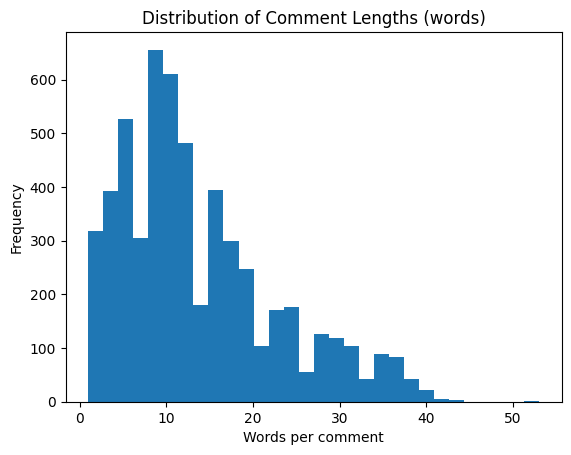

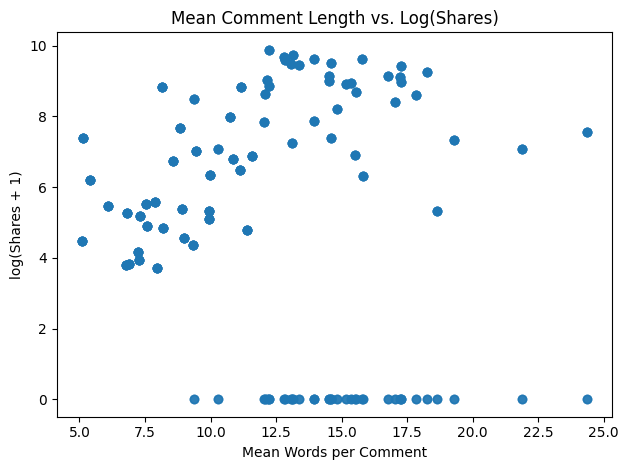

<Figure size 640x480 with 0 Axes>

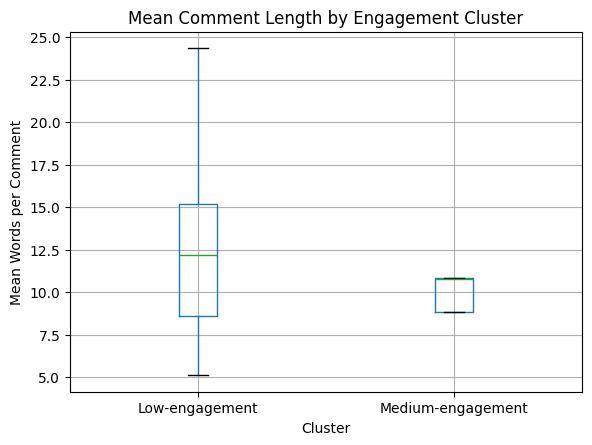

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 1) Load merged DataFrame
#   videos already has video‐level features + sentiment (from previous steps)
videos_with_sentiment = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/videos_with_sentiment.csv', dtype={'id': str})

videos_with_clustering = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/video_metadata_with_clustering.csv', dtype={'id': str})

clusters = videos_with_clustering[['id', 'PC1','PC2','cluster','cluster_label']]

videos = videos_with_sentiment.merge(clusters, on='id', how='left')

print(videos.columns.tolist())

#   comments has raw text and aweme_id
comments = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/comments.csv', dtype={'aweme_id': str})

# 2) Compute comment lengths
comments['char_len'] = comments['text'].fillna('').str.len()
comments['word_len'] = comments['text'].fillna('').str.split().map(len)

# 3) Aggregate per video
length_stats = comments.groupby('aweme_id').agg(
    mean_char_len=('char_len','mean'),
    median_char_len=('char_len','median'),
    mean_word_len=('word_len','mean'),
    median_word_len=('word_len','median'),
    comment_count=('word_len','size')
).reset_index()

# 4) Merge back into videos
videos = videos.merge(length_stats,
                      left_on='id', right_on='aweme_id',
                      how='inner')

# 5) Correlation of length vs. engagement
for length_metric in ['mean_char_len','mean_word_len']:
    for engage in ['stats_playCount','stats_diggCount','stats_shareCount','mean_sentiment']:
        x = videos[length_metric].fillna(0)
        y = videos[engage].fillna(0)
        r, p = pearsonr(x, y)
        print(f"{length_metric} ↔ {engage}: r={r:.3f}, p={p:.3f}")

# 6) Visualizations

# 6a) Histogram of comment lengths (words)
plt.figure()
plt.hist(comments['word_len'], bins=30)
plt.title("Distribution of Comment Lengths (words)")
plt.xlabel("Words per comment")
plt.ylabel("Frequency")
plt.show()

# 6b) Scatterplot: mean comment length vs. log shares
plt.figure()
plt.scatter(videos['mean_word_len'], np.log1p(videos['stats_shareCount']), alpha=0.6)
plt.title("Mean Comment Length vs. Log(Shares)")
plt.xlabel("Mean Words per Comment")
plt.ylabel("log(Shares + 1)")
plt.tight_layout()
plt.show()

# 6c) Boxplot: comment length by engagement cluster
plt.figure()
videos.boxplot(column='mean_word_len', by='cluster_label')
plt.title("Mean Comment Length by Engagement Cluster")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("Mean Words per Comment")
plt.show()
videos.to_csv('/drive/My Drive/EdTech_Final_Project_2025/videos_complete.csv')

## **Survey Analysis**

In [56]:
# @title **Import the User Survey dataset**
drive.mount('/drive')
survey = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/user_survey.csv')
survey.head()
survey.info()
survey.describe()
survey.isnull().sum()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 32 columns):
 #   Column                                                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                                                  --------------  ----- 
 0   response                                                                                                                                                                43 non-null     int64 
 1   Select your age:                                                                                                                                                        43 non-null     object


,0
response,0
Select your age:,0
I consider the educational content creators I follow on TikTok/Instagram Reels to be trustworthy sources of information.,0
The creators I watch seem knowledgeable and well-informed about the topics they teach in their short videos.,0
I feel confident that the information provided by these TikTok/Reels educators is accurate and reliable.,0
These content creators present their educational material in a professional manner (e.g. clear communication and respectful tone).,0
I trust creators who are open about their qualifications or sources when presenting educational content on TikTok/Reels.,0
"When a creator consistently posts high-quality educational videos, it increases my trust in their content.",0
I perceive the educational content from my favorite TikTok/Reels creators to be objective and free of misleading bias.,0
I am more likely to trust a TikTok/Reels educator if I know they have relevant credentials or expertise in the subject.,0


In [58]:
from tabulate import tabulate
print(tabulate(survey.head(), headers='keys', tablefmt='github'))

|    |   response | Select your age:   |   I consider the educational content creators I follow on TikTok/Instagram Reels to be trustworthy sources of information. |   The creators I watch seem knowledgeable and well-informed about the topics they teach in their short videos. |   I feel confident that the information provided by these TikTok/Reels educators is accurate and reliable. |   These content creators present their educational material in a professional manner (e.g. clear communication and respectful tone). |   I trust creators who are open about their qualifications or sources when presenting educational content on TikTok/Reels. |   When a creator consistently posts high-quality educational videos, it increases my trust in their content. |   I perceive the educational content from my favorite TikTok/Reels creators to be objective and free of misleading bias. |   I am more likely to trust a TikTok/Reels educator if I know they have relevant credentials or expertise in the subje

## **Descriptive Statistics**


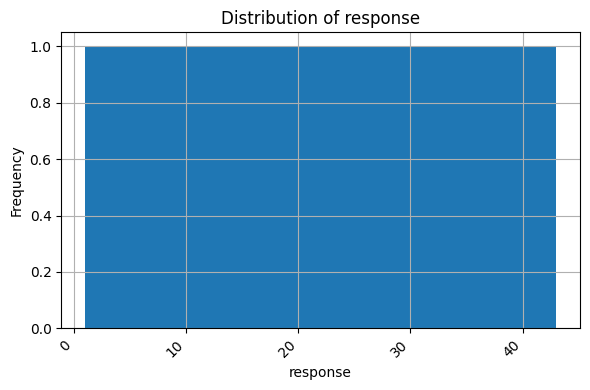

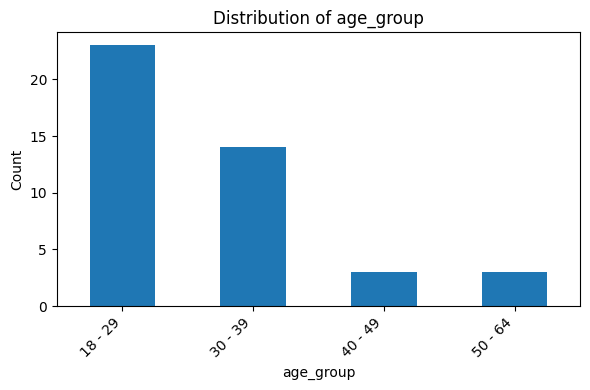

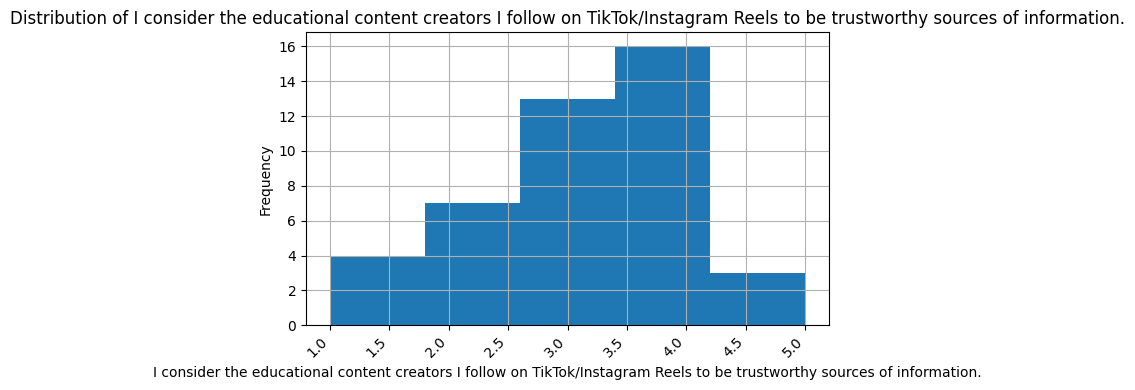

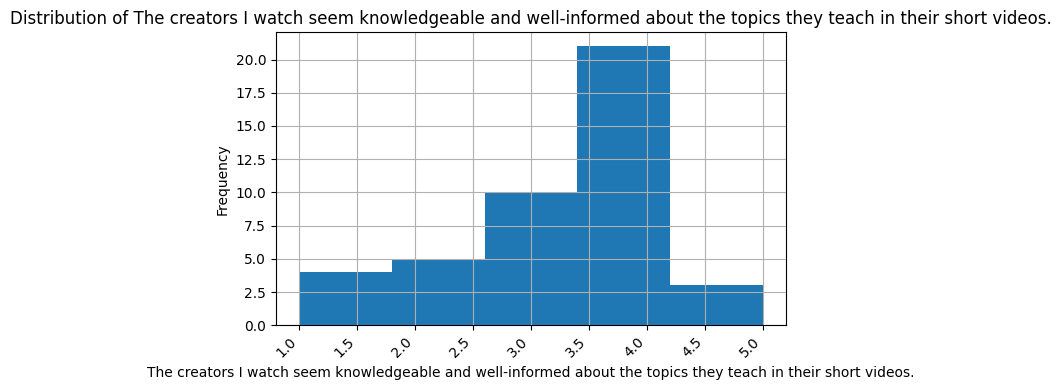

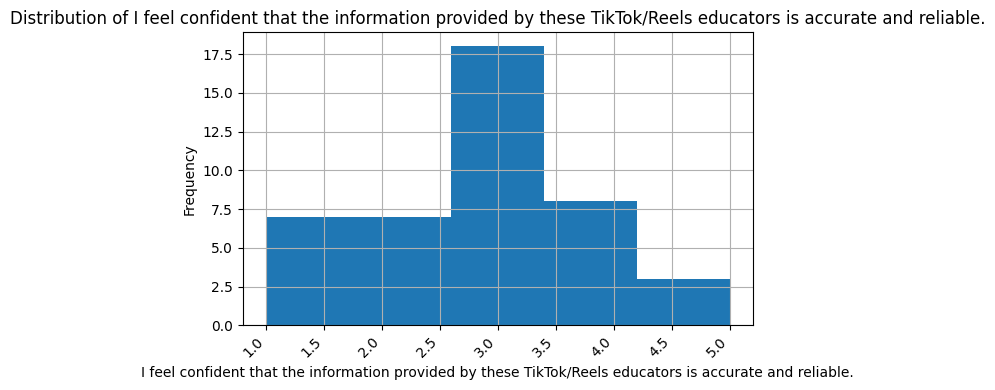

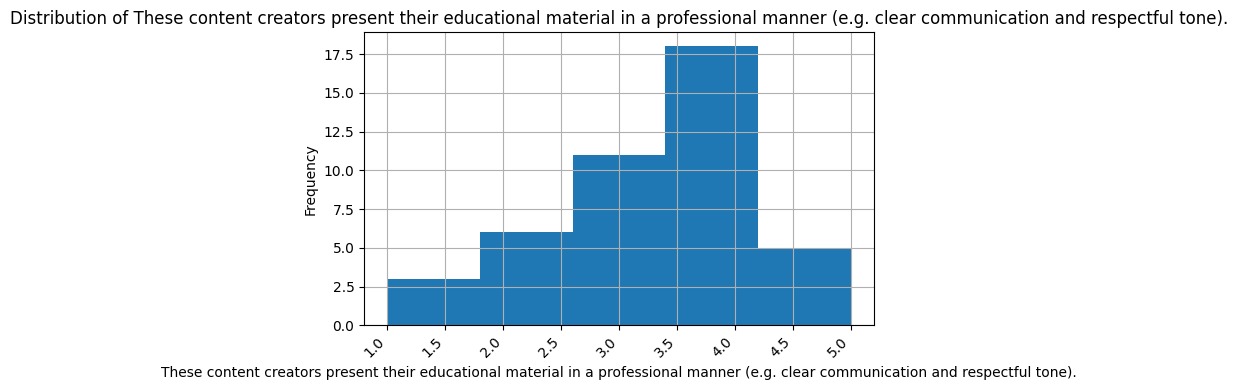

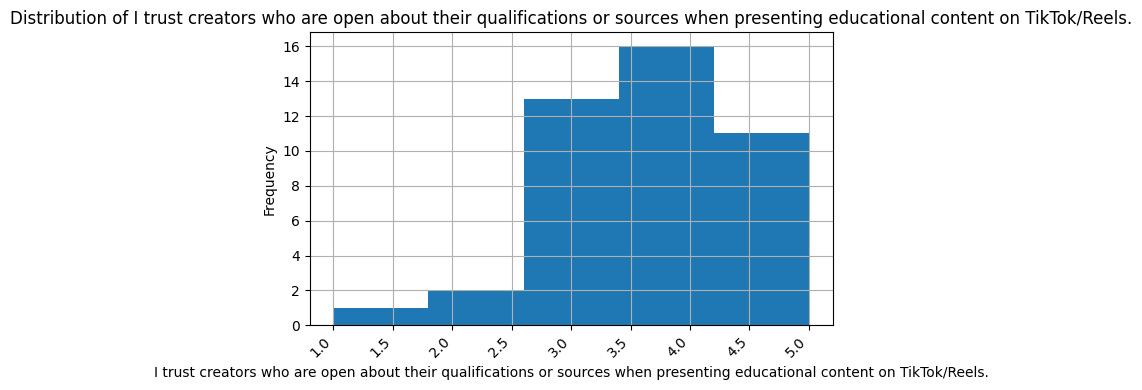

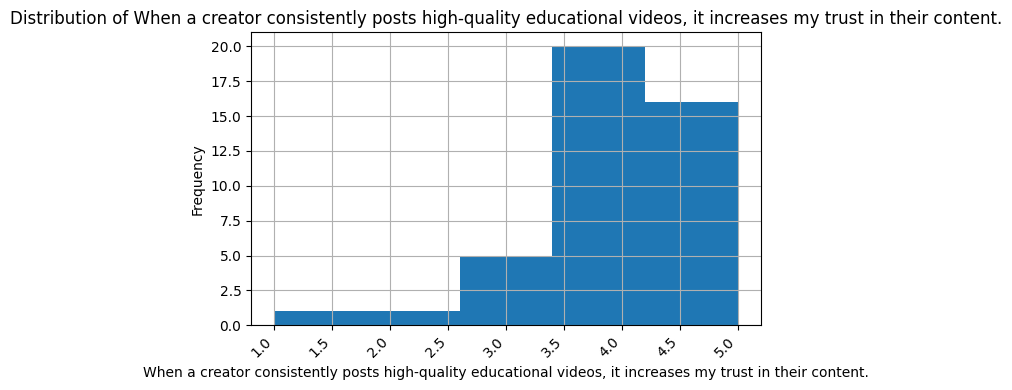

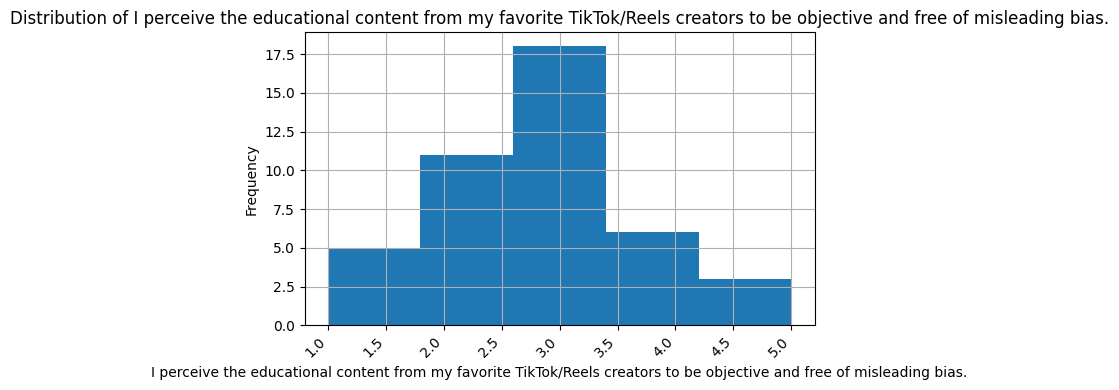

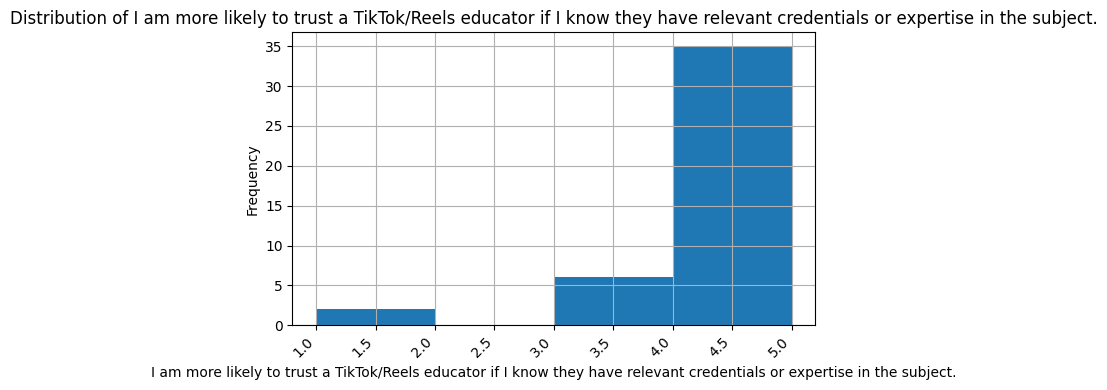

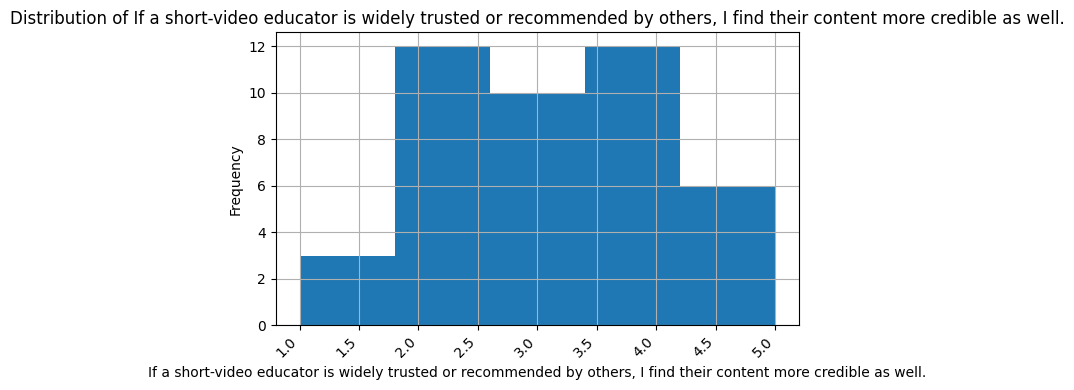

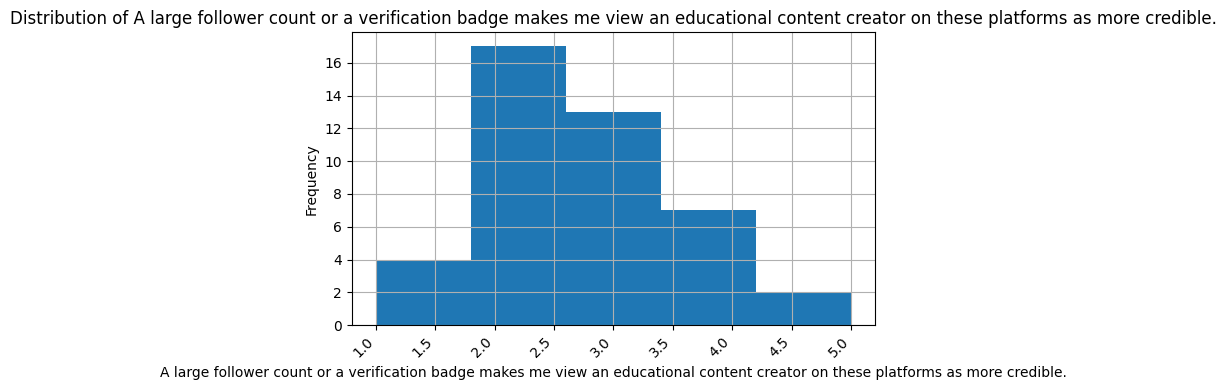

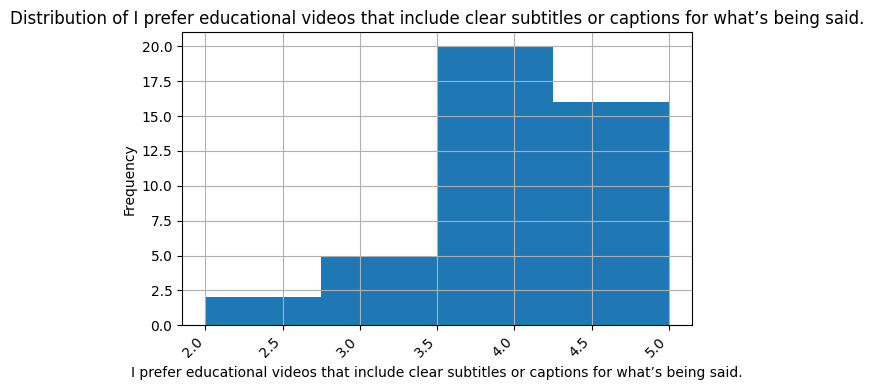

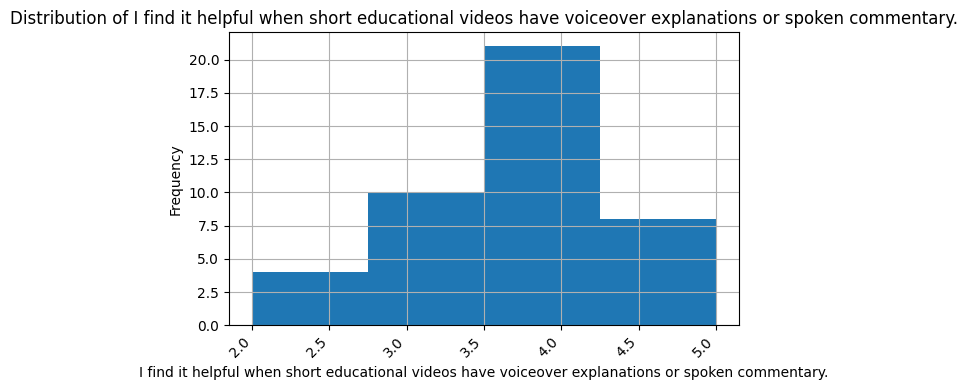

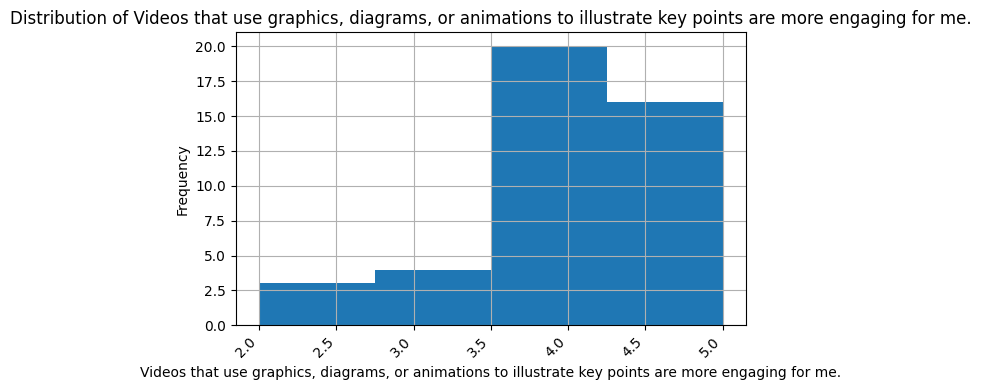

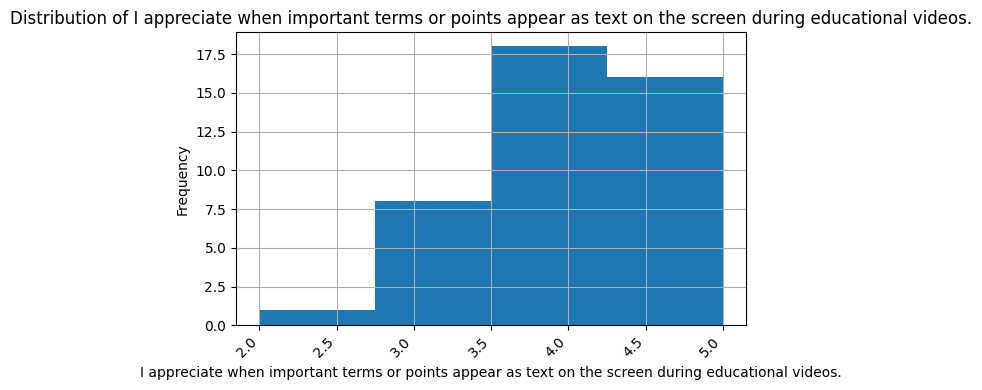

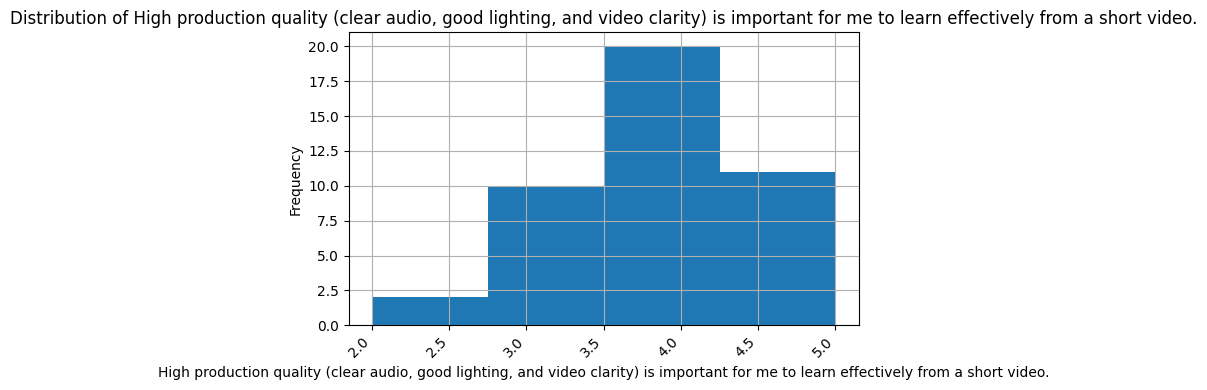

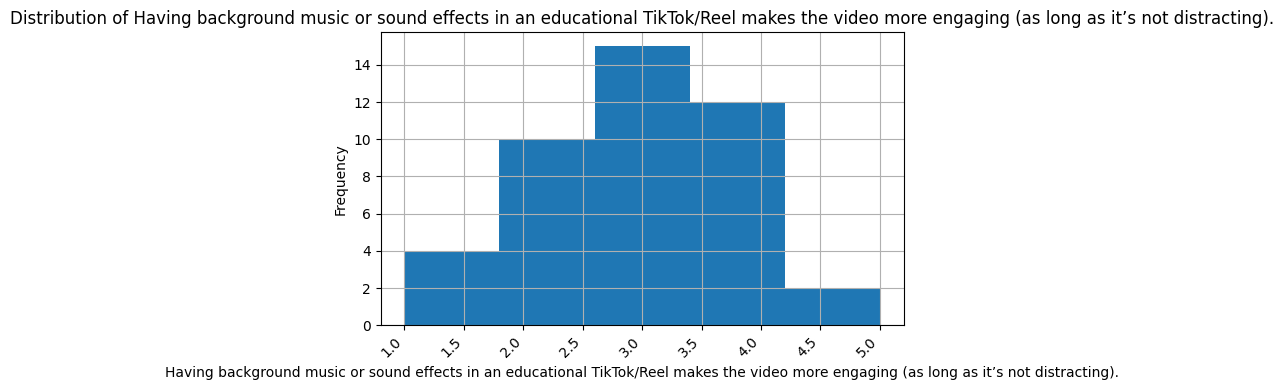

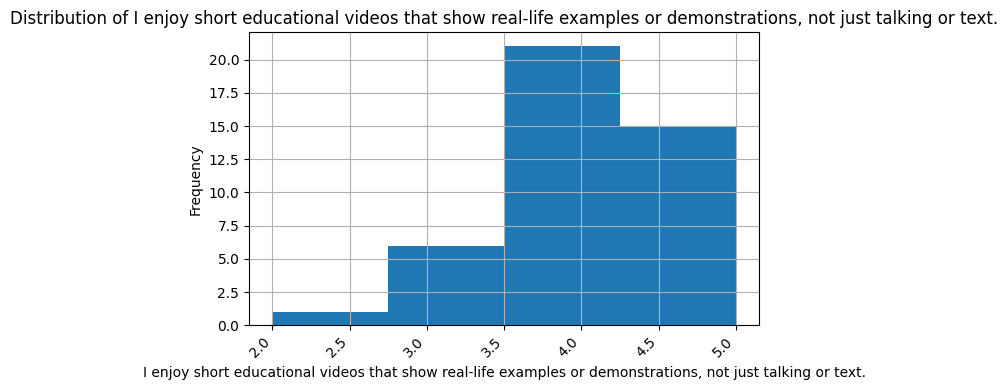

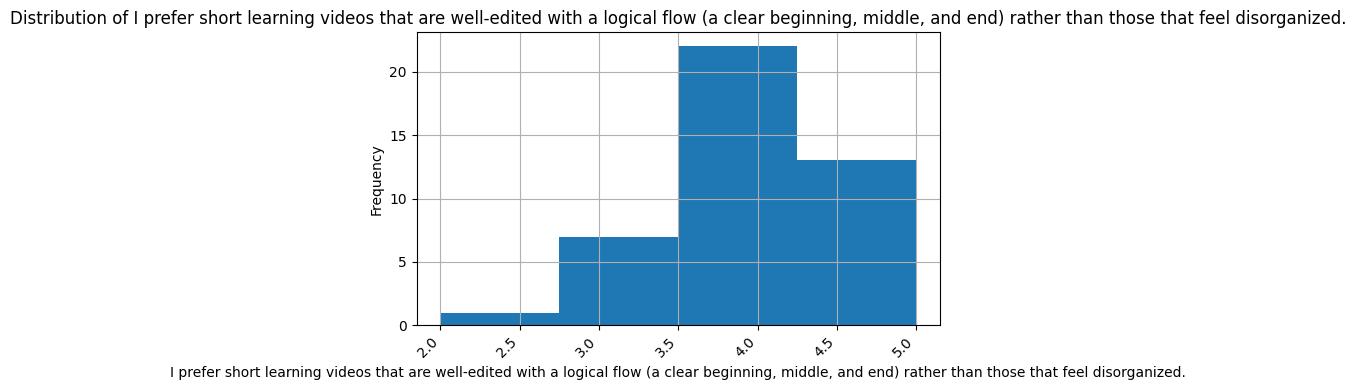

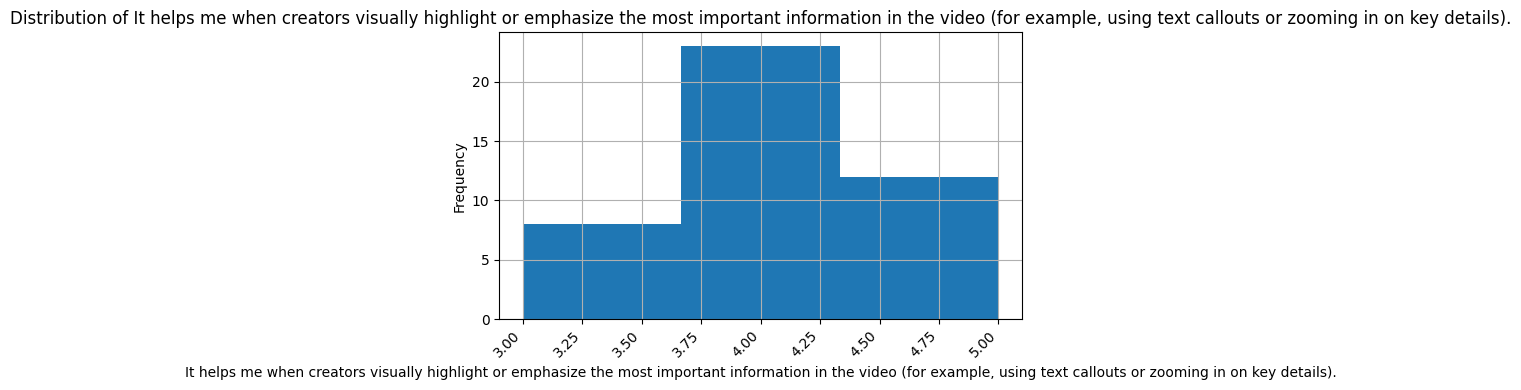

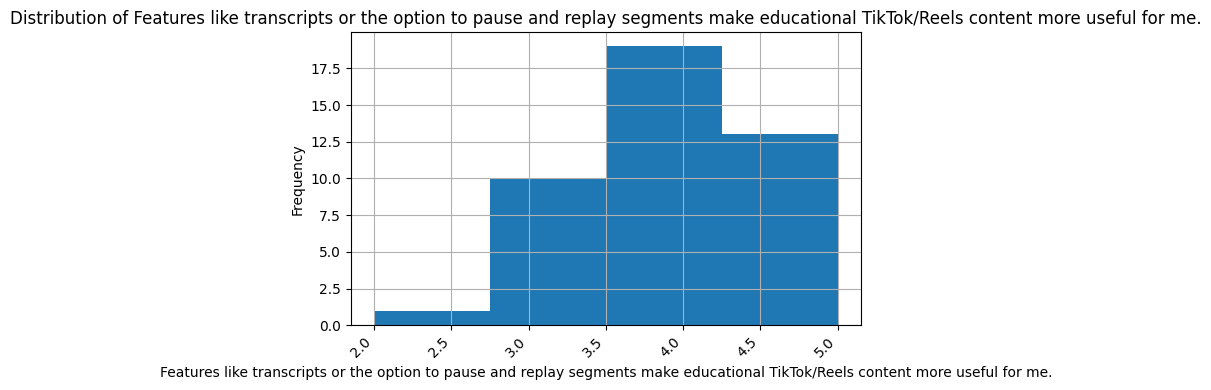

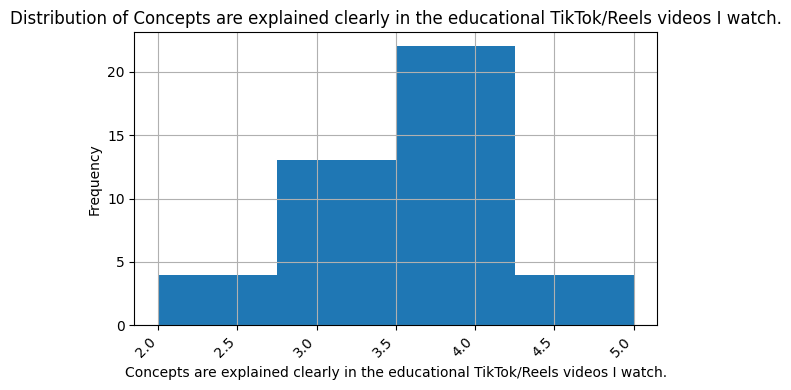

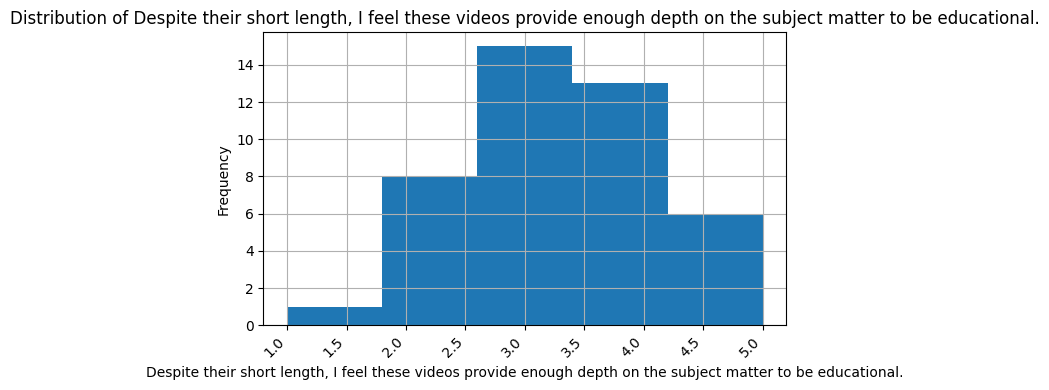

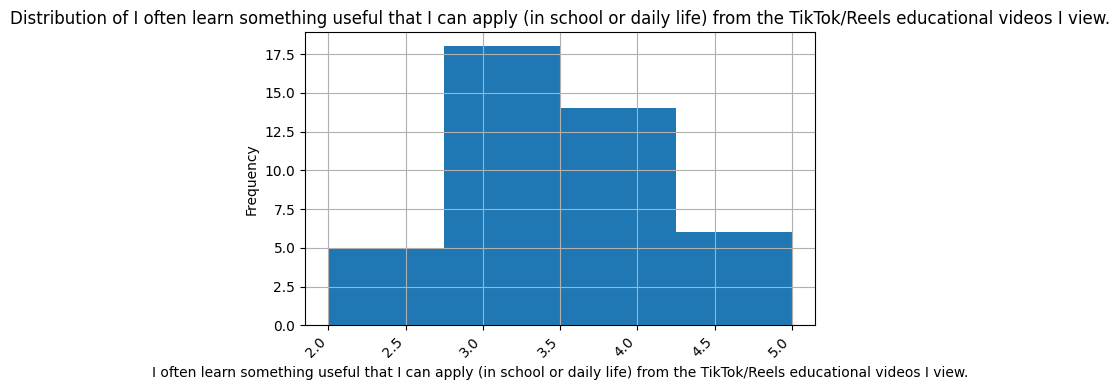

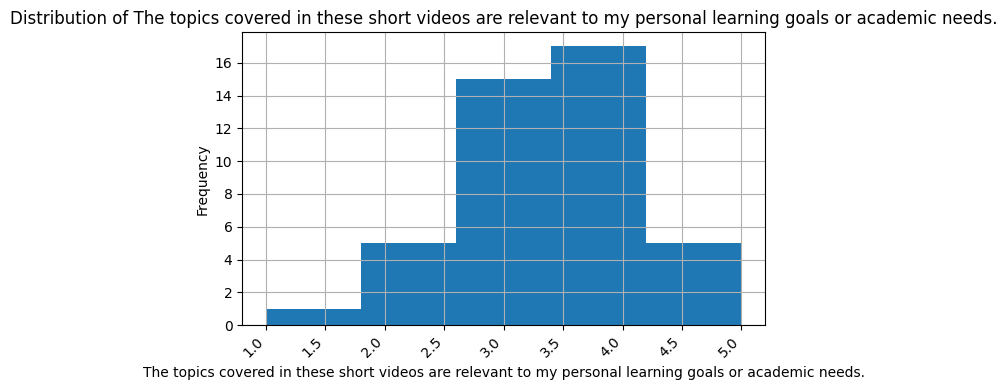

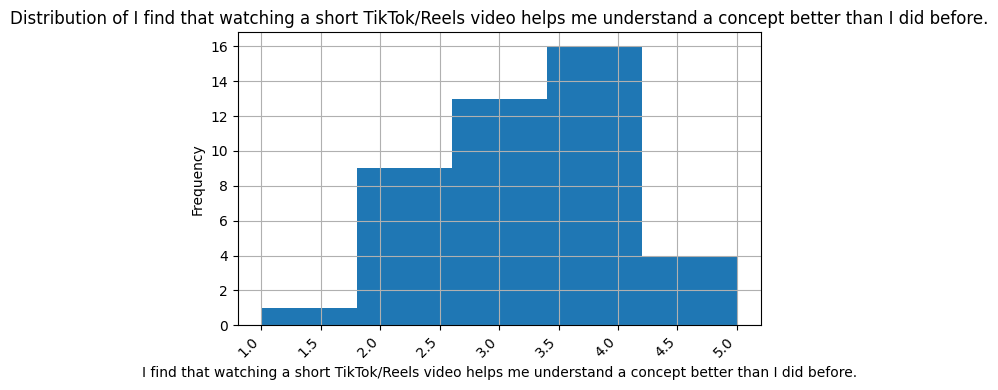

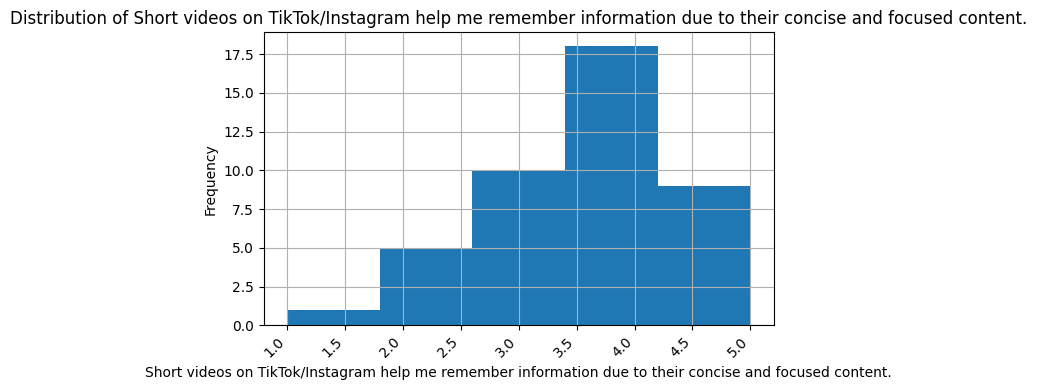

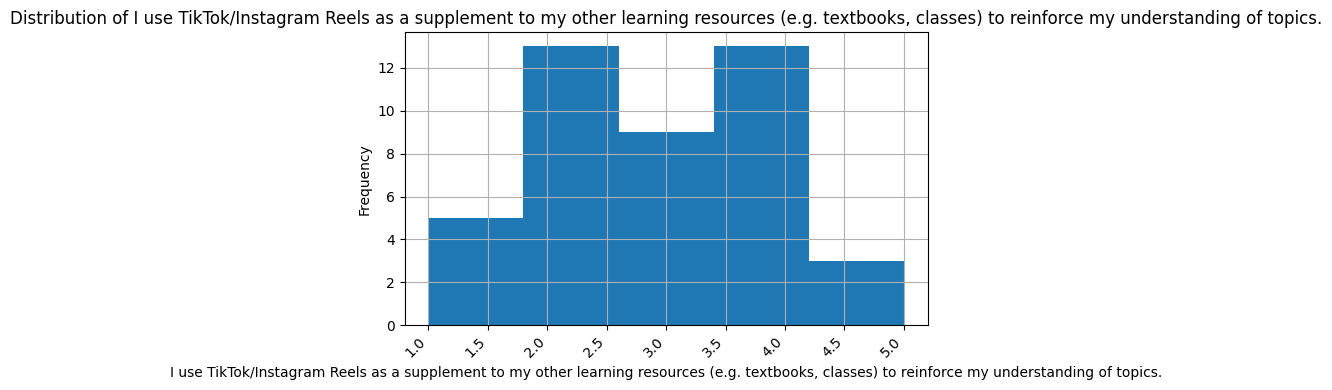

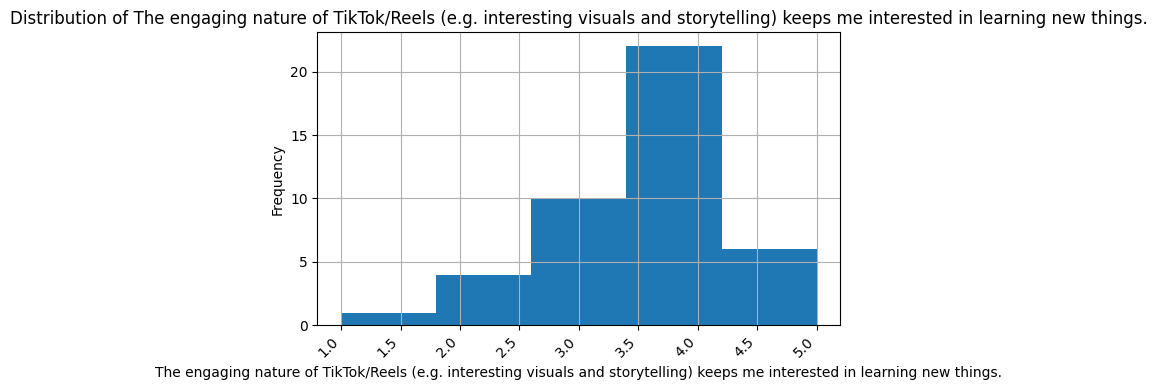

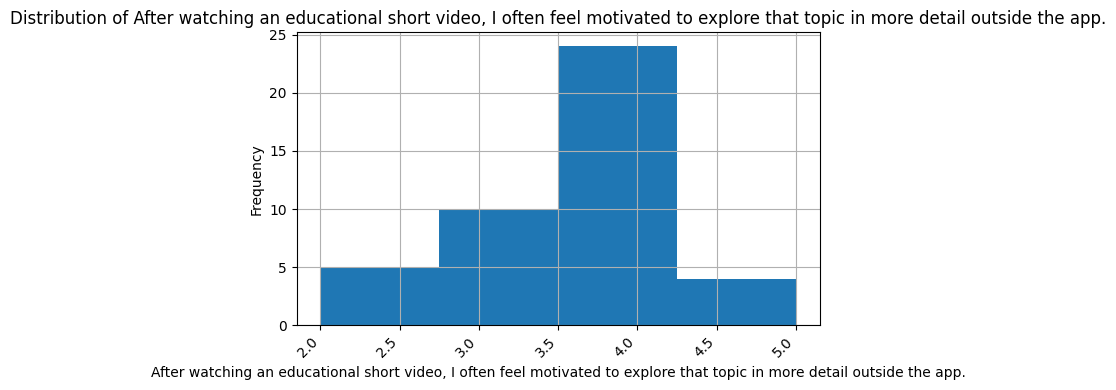

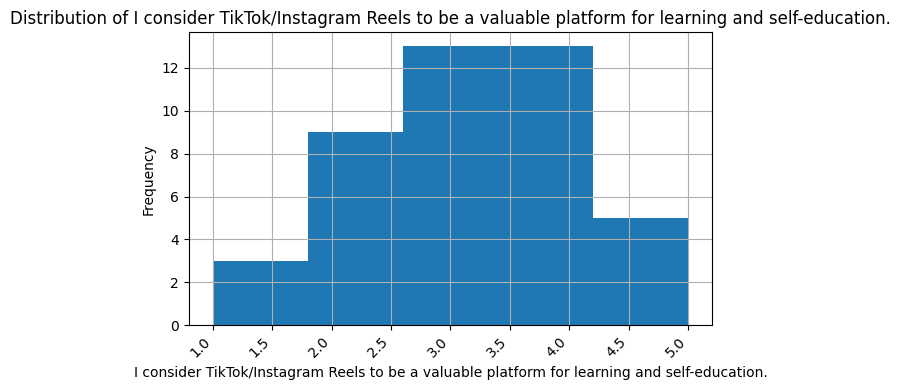

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# 1. Load & rename
survey = pd.read_csv('/drive/My Drive/EdTech_Final_Project_2025/user_survey.csv')
survey = survey.rename(columns={
    'Select your age:': 'age_group'
})
# Identify all columns to plot (here all columns)
columns = survey.columns.tolist()

# Plot distribution for each column
for col in columns:
    plt.figure(figsize=(6, 4))
    # If column is numeric, use histogram; otherwise, use bar chart of value counts
    if pd.api.types.is_numeric_dtype(survey[col]):
        survey[col].dropna().hist(bins=survey[col].nunique() or 10)
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {col}")
    else:
        counts = survey[col].value_counts(dropna=False)
        counts.plot.bar()
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()